# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='assets/fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebooks though as you work through this.

First off, let's load the dataset through torchvision.

In [1]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

  1%|          | 172032/26421880 [00:00<00:16, 1633037.84it/s]

26427392it [00:00, 85572216.55it/s]                             


Extracting /home/robinblanchard/.pytorch/F_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /home/robinblanchard/.pytorch/F_MNIST_data/FashionMNIST/raw


32768it [00:00, 636715.93it/s]
4423680it [00:00, 33463293.91it/s]                           

Extracting /home/robinblanchard/.pytorch/F_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /home/robinblanchard/.pytorch/F_MNIST_data/FashionMNIST/raw
Extracting /home/robinblanchard/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /home/robinblanchard/.pytorch/F_MNIST_data/FashionMNIST/raw



8192it [00:00, 148849.78it/s]


Extracting /home/robinblanchard/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /home/robinblanchard/.pytorch/F_MNIST_data/FashionMNIST/raw
Processing...
Done!


Here we can see one of the images.

5


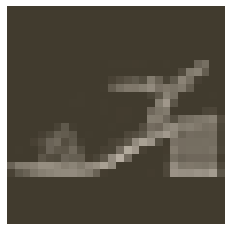

In [27]:
image, label = next(iter(trainloader))
print(label[0].numpy())
helper.imshow(image[0,:]);

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits or log-softmax from the forward pass. It's up to you how many layers you add and the size of those layers.

In [34]:
# TODO: Define your network architecture here
from torch import nn
model = nn.Sequential(nn.Linear(784,256),
                     nn.ReLU(),
                     nn.Linear(256,128),
                     nn.ReLU(),
                     nn.Linear(128,64),
                     nn.ReLU(),
                     nn.Linear(64,10),
                     nn.LogSoftmax(dim=1))

Number of parameters should be : (256\*(784+1) + 128\*(256+1) + 64\*(128+1) + 10\*(64+1))= 242 762

In [33]:
def get_n_params(model):
    pp=0
    for p in list(model.parameters()):
        nn=1
        for s in list(p.size()):
            nn = nn*s
        pp += nn
    return pp

get_n_params(model)

242762

# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [45]:
# TODO: Create the network, define the criterion and optimizer
from torch import optim

model = nn.Sequential(nn.Linear(784,256),
                     nn.ReLU(),
                     nn.Linear(256,128),
                     nn.ReLU(),
                     nn.Linear(128,64),
                     nn.ReLU(),
                     nn.Linear(64,10),
                     nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()

optimizer = optim.SGD(model.parameters(), lr=0.003)

In [46]:
model[0].in_features

784

In [47]:
# TODO: Train the network here
epochs = 15

for e in range(epochs):
    
    running_loss = 0
    for images, labels in trainloader:
        
        optimizer.zero_grad()
        images = images.view(images.shape[0], -1)
        
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss+=loss.item()
    
    print(f"Loss for epoch {e+1} : {running_loss}")

Loss for epoch 1 : 1955.1837898492813
Loss for epoch 2 : 1186.5240277647972
Loss for epoch 3 : 776.8334145247936
Loss for epoch 4 : 655.2247140407562
Loss for epoch 5 : 592.3943617939949
Loss for epoch 6 : 550.7625838518143
Loss for epoch 7 : 519.6436422467232
Loss for epoch 8 : 495.03769171237946
Loss for epoch 9 : 475.5587193220854
Loss for epoch 10 : 459.8211867660284
Loss for epoch 11 : 446.3787234425545
Loss for epoch 12 : 434.71489284932613
Loss for epoch 13 : 424.2901658862829
Loss for epoch 14 : 415.34048034250736
Loss for epoch 15 : 406.4768674969673


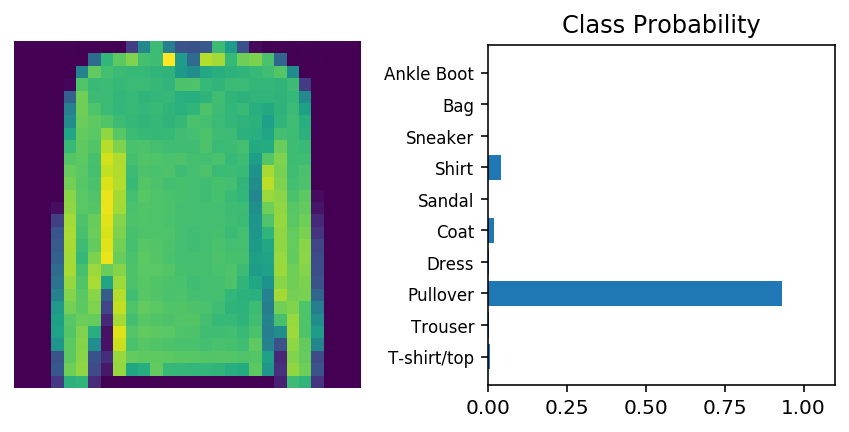

In [57]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img
ps = torch.exp(model(img))

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')